<a href="https://colab.research.google.com/github/HugoGuiAlves/Mini-Projeto-DEX3/blob/main/1Deliverable_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deliverable 01

Trabalho de consultoria para Roof Imóveis.

A empresa deseja investir em imóveis no exterior, e está buscando opções no condado de King County.

Condado de King está localizado no estado de Whashington, fundado em 1852, possui mais de 2,2 milhões de habitantes, cuja sede e cidade mais populosa é Seatle.

Objetivos:

- Informar 5 imóveis para investir e o motivo;
- Informar 5 imóveis para não investir;

##Obtenção de dados

Fontes:


Dataset venda de imóveis:
https://geodacenter.github.io/data-and-lab/KingCounty-HouseSales2015/

Dataset ZipCode:
https://gis-kingcounty.opendata.arcgis.com/datasets/zipcodes-for-king-county-and-surrounding-area-shorelines-zipcode-shore-area/explore?location=47.509950%2C-121.477600%2C8.52

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importando Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

#Importando Dataframes

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DEX03/Deliverable 01/DATA/kc_house_data.csv')

In [ ]:
df_zipcode = pd.read_csv('/content/drive/MyDrive/DEX03/Deliverable 01/DATA/Zipcodes_for_King_County_and_Surrounding_Area_(Shorelines)___zipcode_shore_area.csv')

#Análise dos dados

##Verificando os DF's

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df_zipcode.head()

,OBJECTID,ZIP,ZIPCODE,COUNTY,ZIP_TYPE,COUNTY_NAME,PREFERRED_CITY,Shape_Length,Shape_Area
0,1,98001,98001,33,Standard,King County,AUBURN,148134.771476,5.261214e+08
1,2,98002,98002,33,Standard,King County,AUBURN,105168.476823,2.044452e+08
2,3,98003,98003,33,Standard,King County,FEDERAL WAY,121645.069928,3.169812e+08
3,4,98004,98004,33,Standard,King County,BELLEVUE,108801.063326,2.014512e+08
4,5,98005,98005,33,Standard,King County,BELLEVUE,116930.354131,2.112733e+08


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
len(df['id'].unique())

21436

Há casas que foram vendidas mais de uma vez no período

In [ ]:
df_zipcode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OBJECTID        209 non-null    int64  
 1   ZIP             209 non-null    int64  
 2   ZIPCODE         209 non-null    int64  
 3   COUNTY          209 non-null    int64  
 4   ZIP_TYPE        209 non-null    object 
 5   COUNTY_NAME     209 non-null    object 
 6   PREFERRED_CITY  209 non-null    object 
 7   Shape_Length    209 non-null    float64
 8   Shape_Area      209 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 14.8+ KB


Só precisaremos das colunas ZIPCODE e PREFERRED_CITY

In [ ]:
df_zipcode.drop(['OBJECTID', 'ZIP','COUNTY','ZIP_TYPE','COUNTY_NAME','Shape_Length','Shape_Area'], axis=1, inplace=True)

In [ ]:
df_zipcode.rename(columns={'ZIPCODE': 'zipcode', 'PREFERRED_CITY': 'cidade'}, inplace=True)

In [ ]:
df_zipcode

,zipcode,cidade
0,98001,AUBURN
1,98002,AUBURN
2,98003,FEDERAL WAY
3,98004,BELLEVUE
4,98005,BELLEVUE
...,...,...
204,98940,RONALD
205,98941,ROSLYN
206,98943,SOUTH CLE ELUM
207,98946,THORP


Remover os zipcodes duplicados

In [ ]:
dfz = df_zipcode.drop_duplicates(subset=['zipcode']).reset_index(drop=True)

In [ ]:
dfz

,zipcode,cidade
0,98001,AUBURN
1,98002,AUBURN
2,98003,FEDERAL WAY
3,98004,BELLEVUE
4,98005,BELLEVUE
...,...,...
193,98940,RONALD
194,98941,ROSLYN
195,98943,SOUTH CLE ELUM
196,98946,THORP


Cuidando da coluna de data, para que fique no formato correto e possamos separar as colunas em DIA, MES e ANO

In [ ]:
# Transformar coluna 'date' em Datetype
df['date'] = pd.to_datetime(df['date'])

In [ ]:
# Criando a coluna Ano
df['ano'] = pd.DatetimeIndex(df['date']).year
# Criando a coluna Mês
df['mes'] = pd.DatetimeIndex(df['date']).month
# Criando a coluna Dia
df['dia'] = pd.DatetimeIndex(df['date']).day

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [ ]:
dfz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   zipcode  198 non-null    int64 
 1   cidade   198 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.2+ KB


##Unindo os DF's

In [ ]:
df2 = pd.merge(df,dfz, on='zipcode', how='left')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 0 to 21612
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

Criando colunas do preço por pés ao quadrado

In [ ]:
# preço por pés ao quadrado - área habitável 
df2['preco por ft² habitavel'] = df2['price'] / df2['sqft_living']
# preço por pés ao quadrado - área lote 
df2['preco por ft² lote'] = df2['price'] / df2['sqft_lot']

Podemos remover a coluna:

- A coluna DATE já foi desmembrada em nas colunas DIA, MES e ANO

In [ ]:
df2.drop('date', axis=1, inplace=True)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 0 to 21612
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       21613 non-null  int64  
 1   price                    21613 non-null  float64
 2   bedrooms                 21613 non-null  int64  
 3   bathrooms                21613 non-null  float64
 4   sqft_living              21613 non-null  int64  
 5   sqft_lot                 21613 non-null  int64  
 6   floors                   21613 non-null  float64
 7   waterfront               21613 non-null  int64  
 8   view                     21613 non-null  int64  
 9   condition                21613 non-null  int64  
 10  grade                    21613 non-null  int64  
 11  sqft_above               21613 non-null  int64  
 12  sqft_basement            21613 non-null  int64  
 13  yr_built                 21613 non-null  int64  
 14  yr_renovated          

##Definindo funções de gráficos

In [ ]:
def histograma(coluna, bins):
  fig = plt.figure()
  plt.hist(df2[coluna],bins=bins)
  plt.title(coluna, loc = 'left')
  plt.xlabel(coluna)
  plt.ylabel('Frequência')
  plt.show()

verificando o gráfico de frequência de cada atributo

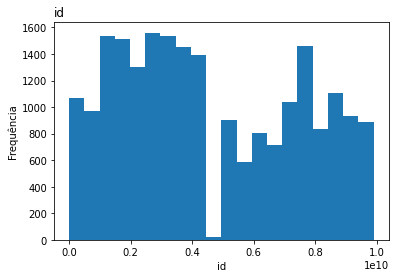

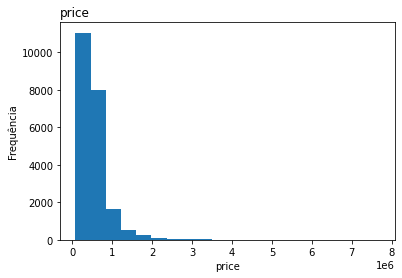

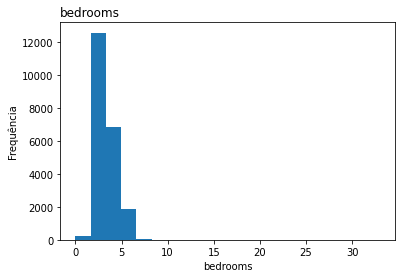

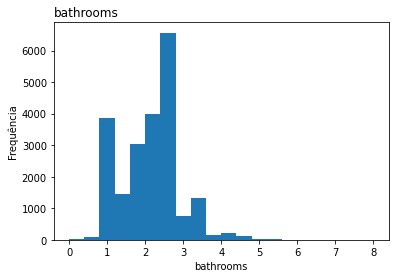

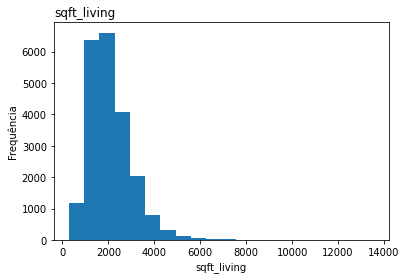

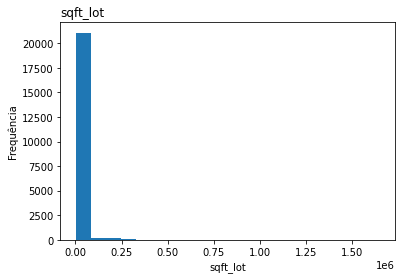

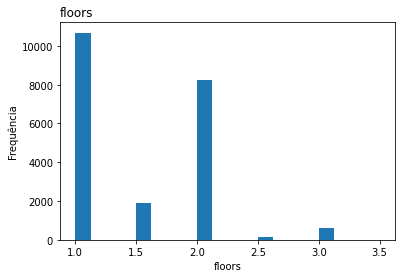

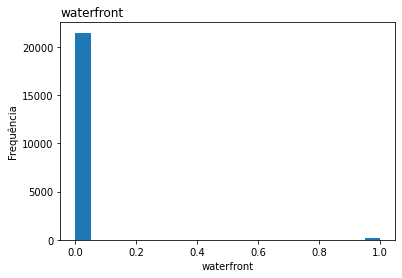

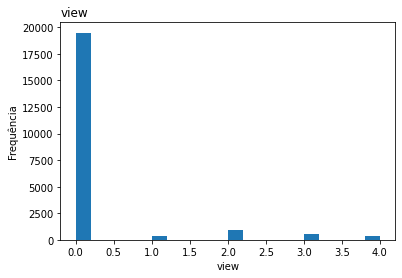

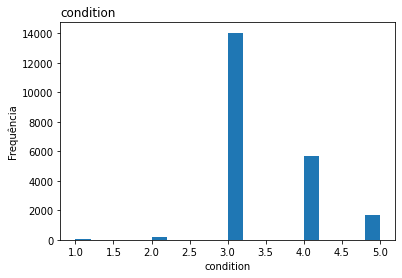

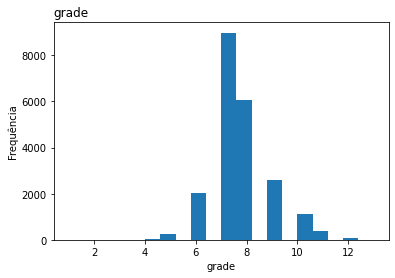

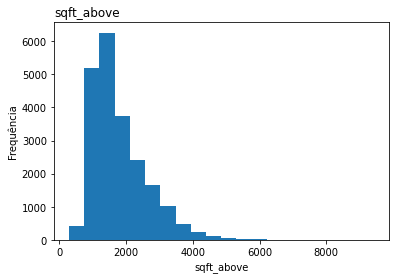

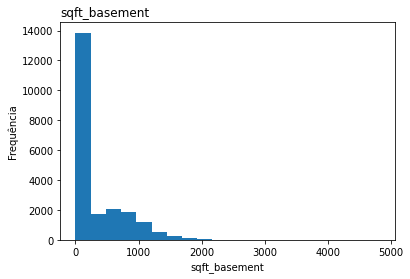

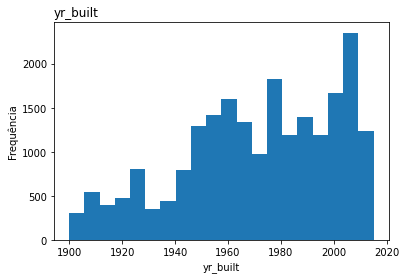

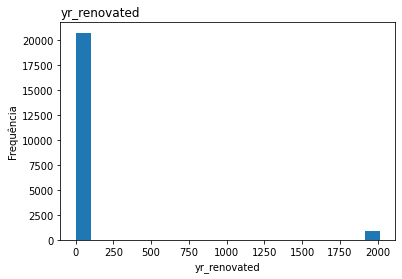

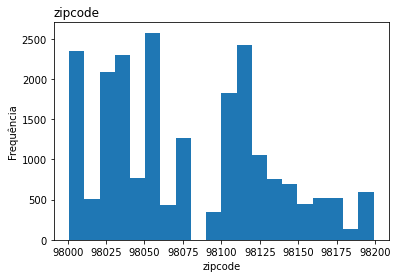

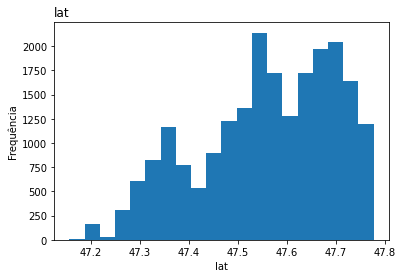

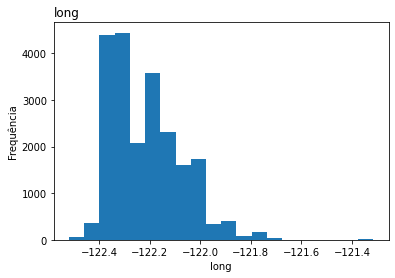

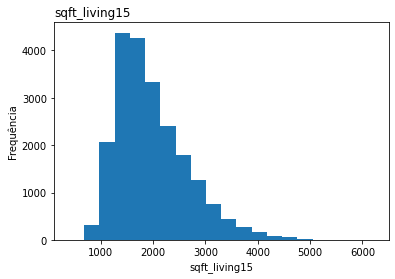

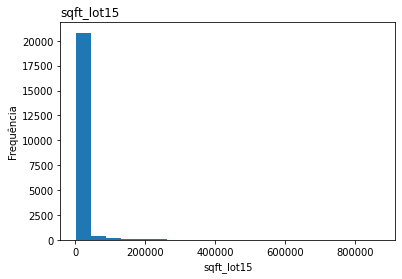

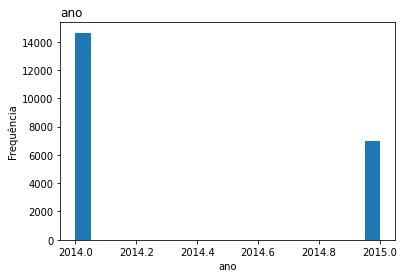

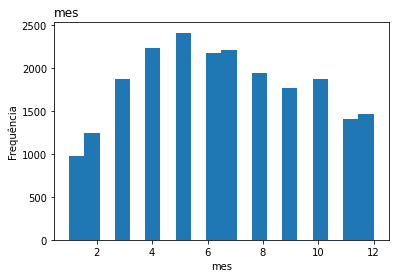

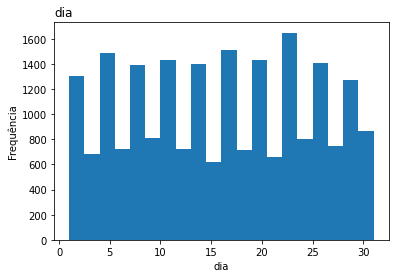

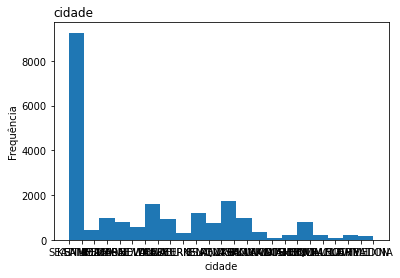

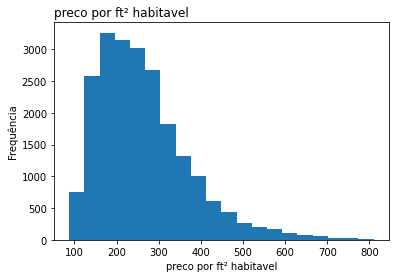

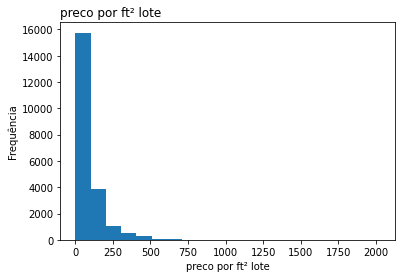

In [ ]:
for item in df2.columns:
  histograma(item, 20)

In [ ]:
len(df2['id'].unique())

21436

In [ ]:
len(df2['id'])

21613

In [ ]:
# Criando DF com valores duplicados na coluna ID
dfdup = df2[df2['id'].duplicated(keep=False)]

In [ ]:
# Ordenando o DF com valores duplicados na coluna ID
dfdup.sort_values(by=['id','ano','mes','dia'], ascending=False)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,ano,mes,dia,cidade,preco por ft² habitavel,preco por ft² lote
1086,9834200885,550000.0,4,2.50,2080,4080,1.0,0,0,5,7,1040,1040,1962,0,98144,47.5720,-122.290,1340,4080,2015,4,20,SEATTLE,264.423077,134.803922
1085,9834200885,360000.0,4,2.50,2080,4080,1.0,0,0,5,7,1040,1040,1962,0,98144,47.5720,-122.290,1340,4080,2014,7,17,SEATTLE,173.076923,88.235294
15200,9834200305,615000.0,3,1.00,1790,3876,1.5,0,0,5,7,1090,700,1904,0,98144,47.5750,-122.288,1360,4080,2015,2,10,SEATTLE,343.575419,158.668731
15199,9834200305,350000.0,3,1.00,1790,3876,1.5,0,0,5,7,1090,700,1904,0,98144,47.5750,-122.288,1360,4080,2014,7,16,SEATTLE,195.530726,90.299278
6346,9828200460,430000.0,2,1.00,700,4800,1.0,0,0,3,7,700,0,1922,0,98122,47.6147,-122.300,1440,4800,2015,1,6,SEATTLE,614.285714,89.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11433,109200390,245000.0,3,1.75,1480,3900,1.0,0,0,4,7,1480,0,1980,0,98023,47.2977,-122.367,1830,6956,2014,8,20,FEDERAL WAY,165.540541,62.820513
16815,7200179,175000.0,2,1.00,840,12750,1.0,0,0,3,6,840,0,1925,0,98055,47.4840,-122.211,1480,6969,2015,4,24,RENTON,208.333333,13.725490
16814,7200179,150000.0,2,1.00,840,12750,1.0,0,0,3,6,840,0,1925,0,98055,47.4840,-122.211,1480,6969,2014,10,16,RENTON,178.571429,11.764706
2497,1000102,300000.0,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316,2015,4,22,AUBURN,125.000000,32.006828


In [ ]:
display(dfdup)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,ano,mes,dia,cidade,preco por ft² habitavel,preco por ft² lote
93,6021501535,430000.0,3,1.50,1580,5000,1.0,0,0,3,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500,2014,7,25,SEATTLE,272.151899,86.000000
94,6021501535,700000.0,3,1.50,1580,5000,1.0,0,0,3,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500,2014,12,23,SEATTLE,443.037975,140.000000
313,4139480200,1384000.0,4,3.25,4290,12103,1.0,0,3,3,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244,2014,6,18,BELLEVUE,322.610723,114.351814
314,4139480200,1400000.0,4,3.25,4290,12103,1.0,0,3,3,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244,2014,12,9,BELLEVUE,326.340326,115.673800
324,7520000520,232000.0,2,1.00,1240,12092,1.0,0,0,3,6,960,280,1922,1984,98146,47.4957,-122.352,1820,7460,2014,9,5,SEATTLE,187.096774,19.186239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20670,8564860270,502000.0,4,2.50,2680,5539,2.0,0,0,3,8,2680,0,2013,0,98045,47.4759,-121.734,2680,5992,2015,3,30,NORTH BEND,187.313433,90.630078
20779,6300000226,240000.0,4,1.00,1200,2171,1.5,0,0,3,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598,2014,6,26,SEATTLE,200.000000,110.548135
20780,6300000226,380000.0,4,1.00,1200,2171,1.5,0,0,3,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598,2015,5,4,SEATTLE,316.666667,175.034546
21580,7853420110,594866.0,3,3.00,2780,6000,2.0,0,0,3,9,2780,0,2013,0,98065,47.5184,-121.886,2850,6000,2014,10,3,SNOQUALMIE,213.980576,99.144333


In [ ]:
# Verificando a quantidade de vezes que um imóvel foi vendido
dfdup['id'].value_counts()

795000620     3
6021501535    2
3935900232    2
1217000340    2
9238500040    2
             ..
2621600015    2
2206700215    2
2787460720    2
3883800011    2
7853420110    2
Name: id, Length: 176, dtype: int64

In [ ]:
dfdup[dfdup['id'] == 795000620 ]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,ano,mes,dia,cidade,preco por ft² habitavel,preco por ft² lote
17602,795000620,115000.0,3,1.0,1080,6250,1.0,0,0,2,5,1080,0,1950,0,98168,47.5045,-122.33,1070,6250,2014,9,24,SEATTLE,106.481481,18.40
17603,795000620,124000.0,3,1.0,1080,6250,1.0,0,0,2,5,1080,0,1950,0,98168,47.5045,-122.33,1070,6250,2014,12,15,SEATTLE,114.814815,19.84
17604,795000620,157000.0,3,1.0,1080,6250,1.0,0,0,2,5,1080,0,1950,0,98168,47.5045,-122.33,1070,6250,2015,3,11,SEATTLE,145.370370,25.12


podemos remover o index 17603 para verificar o lucro total do período

In [ ]:
dfdup = dfdup.drop(17603)

In [ ]:
dfdup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 93 to 21581
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       352 non-null    int64  
 1   price                    352 non-null    float64
 2   bedrooms                 352 non-null    int64  
 3   bathrooms                352 non-null    float64
 4   sqft_living              352 non-null    int64  
 5   sqft_lot                 352 non-null    int64  
 6   floors                   352 non-null    float64
 7   waterfront               352 non-null    int64  
 8   view                     352 non-null    int64  
 9   condition                352 non-null    int64  
 10  grade                    352 non-null    int64  
 11  sqft_above               352 non-null    int64  
 12  sqft_basement            352 non-null    int64  
 13  yr_built                 352 non-null    int64  
 14  yr_renovated           

In [ ]:
# Criando DF de lucro
lucro = dfdup[['id','price']].groupby(by=['id']).diff()

In [ ]:
# Renomeando a coluna 'price' para 'lucro'
lucro.rename(columns = {'price': 'lucro/prejuízo'}, inplace = True)

In [ ]:
lucro

,lucro/prejuízo
93,NaN
94,270000.0
313,NaN
314,16000.0
324,NaN
...,...
20670,52010.0
20779,NaN
20780,140000.0
21580,NaN


In [ ]:
# Juntando os DF, como eles estão na mesma ordem podemos juntar direto
dfdup = dfdup.join(lucro)

In [ ]:
display(dfdup)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,ano,mes,dia,cidade,preco por ft² habitavel,preco por ft² lote,lucro/prejuízo
93,6021501535,430000.0,3,1.50,1580,5000,1.0,0,0,3,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500,2014,7,25,SEATTLE,272.151899,86.000000,NaN
94,6021501535,700000.0,3,1.50,1580,5000,1.0,0,0,3,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500,2014,12,23,SEATTLE,443.037975,140.000000,270000.0
313,4139480200,1384000.0,4,3.25,4290,12103,1.0,0,3,3,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244,2014,6,18,BELLEVUE,322.610723,114.351814,NaN
314,4139480200,1400000.0,4,3.25,4290,12103,1.0,0,3,3,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244,2014,12,9,BELLEVUE,326.340326,115.673800,16000.0
324,7520000520,232000.0,2,1.00,1240,12092,1.0,0,0,3,6,960,280,1922,1984,98146,47.4957,-122.352,1820,7460,2014,9,5,SEATTLE,187.096774,19.186239,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20670,8564860270,502000.0,4,2.50,2680,5539,2.0,0,0,3,8,2680,0,2013,0,98045,47.4759,-121.734,2680,5992,2015,3,30,NORTH BEND,187.313433,90.630078,52010.0
20779,6300000226,240000.0,4,1.00,1200,2171,1.5,0,0,3,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598,2014,6,26,SEATTLE,200.000000,110.548135,NaN
20780,6300000226,380000.0,4,1.00,1200,2171,1.5,0,0,3,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598,2015,5,4,SEATTLE,316.666667,175.034546,140000.0
21580,7853420110,594866.0,3,3.00,2780,6000,2.0,0,0,3,9,2780,0,2013,0,98065,47.5184,-121.886,2850,6000,2014,10,3,SNOQUALMIE,213.980576,99.144333,NaN


In [ ]:
# Criando a coluna de lucro em percentual
dfdup['lucro/prejuízo em %'] = dfdup['lucro/prejuízo'] / (dfdup['price']-dfdup['lucro/prejuízo']) * 100

In [ ]:
dfdup = dfdup.sort_values(by=['lucro/prejuízo em %'], ascending=False)

In [ ]:
dfdup.head(15)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,ano,mes,dia,cidade,preco por ft² habitavel,preco por ft² lote,lucro/prejuízo,lucro/prejuízo em %
13629,2023049218,445000.0,2,1.00,930,7740,1.0,0,0,1,5,930,0,1932,0,98148,47.4611,-122.324,1620,8584,2015,3,16,SEATTLE,478.494624,57.493540,339500.0,321.800948
15811,7129304540,440000.0,5,2.00,1430,5600,1.5,0,0,3,6,1430,0,1947,0,98118,47.5192,-122.266,1860,5980,2015,5,14,SEATTLE,307.692308,78.571429,307000.0,230.827068
14367,3333002450,490000.0,1,1.00,850,8050,1.0,0,0,2,6,850,0,1906,0,98118,47.5427,-122.288,1590,5180,2015,1,22,SEATTLE,576.470588,60.869565,325000.0,196.969697
10254,2422049104,235000.0,2,1.00,830,9000,1.0,0,0,3,6,830,0,1939,0,98032,47.3813,-122.243,1160,7680,2014,12,30,KENT,283.132530,26.111111,150000.0,176.470588
8275,3883800011,219900.0,3,1.00,860,10426,1.0,0,0,3,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250,2015,4,8,SEATTLE,255.697674,21.091502,137900.0,168.170732
19336,6021500970,874950.0,2,1.00,1080,4000,1.0,0,0,3,7,1080,0,1940,0,98117,47.6902,-122.387,1530,4240,2015,4,7,SEATTLE,810.138889,218.737500,529950.0,153.608696
17581,1423049019,220000.0,2,1.00,580,7500,1.0,0,0,3,5,580,0,1943,0,98178,47.4852,-122.251,1700,11250,2015,3,31,SEATTLE,379.310345,29.333333,130000.0,144.444444
12339,5132000140,415000.0,6,1.00,1370,5080,1.5,0,0,3,6,1120,250,1931,0,98106,47.5238,-122.350,1020,5080,2015,1,20,SEATTLE,302.919708,81.692913,240000.0,137.142857
11062,6141100320,570000.0,2,1.00,1500,6685,1.0,0,0,3,7,1190,310,1926,0,98133,47.7186,-122.354,1420,6561,2015,2,13,SEATTLE,380.000000,85.265520,325000.0,132.653061
8341,4154300296,545000.0,3,1.00,960,5030,1.0,0,0,3,7,960,0,1955,0,98118,47.5611,-122.280,1460,5400,2015,3,18,SEATTLE,567.708333,108.349901,310000.0,131.914894


In [ ]:
# Retirando as linhas com valores NaN
dfdup = dfdup.dropna()

In [ ]:
dfdup

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,ano,mes,dia,cidade,preco por ft² habitavel,preco por ft² lote,lucro/prejuízo,lucro/prejuízo em %
13629,2023049218,445000.0,2,1.00,930,7740,1.0,0,0,1,5,930,0,1932,0,98148,47.4611,-122.324,1620,8584,2015,3,16,SEATTLE,478.494624,57.493540,339500.0,321.800948
15811,7129304540,440000.0,5,2.00,1430,5600,1.5,0,0,3,6,1430,0,1947,0,98118,47.5192,-122.266,1860,5980,2015,5,14,SEATTLE,307.692308,78.571429,307000.0,230.827068
14367,3333002450,490000.0,1,1.00,850,8050,1.0,0,0,2,6,850,0,1906,0,98118,47.5427,-122.288,1590,5180,2015,1,22,SEATTLE,576.470588,60.869565,325000.0,196.969697
10254,2422049104,235000.0,2,1.00,830,9000,1.0,0,0,3,6,830,0,1939,0,98032,47.3813,-122.243,1160,7680,2014,12,30,KENT,283.132530,26.111111,150000.0,176.470588
8275,3883800011,219900.0,3,1.00,860,10426,1.0,0,0,3,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250,2015,4,8,SEATTLE,255.697674,21.091502,137900.0,168.170732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7846,4139420590,1200000.0,4,3.50,4560,16643,1.0,0,3,3,12,2230,2330,1995,0,98006,47.5521,-122.115,4060,15177,2014,8,27,BELLEVUE,263.157895,72.102385,-12500.0,-1.030928
10611,2767603612,489000.0,2,2.25,1290,1334,3.0,0,0,3,8,1290,0,2007,0,98107,47.6719,-122.382,1350,1334,2015,1,13,SEATTLE,379.069767,366.566717,-11000.0,-2.200000
837,8682262400,419950.0,2,1.75,1350,4003,1.0,0,0,3,8,1350,0,2004,0,98053,47.7176,-122.033,1350,4479,2015,5,13,REDMOND,311.074074,104.908818,-10050.0,-2.337209
5593,2726049071,489950.0,2,1.00,820,4206,1.0,0,0,3,5,820,0,1949,0,98125,47.7076,-122.284,1810,7200,2015,4,8,SEATTLE,597.500000,116.488350,-20050.0,-3.931373
